In [8]:
import pandas as pd

df = pd.read_csv(r"D:\Project\glp1_ci_project_2020_2025\data\processed\sales_summary.csv")

# Convert all columns except year to numeric (force errors to 0)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)

df


,year,ozempic_dkk_mn,rybelsus_dkk_mn,wegovy_dkk_mn,mounjaro_usd_mn,zepbound_usd_mn
0,2020,21211,1873,0.0,0.0,0
1,2021,33705,4838,0.0,0.0,0
2,2022,59750,11299,0.0,482.0,0
3,2023,95703,0,0.0,0.0,0
4,2024,0,0,0.0,0.0,0


In [10]:
products = ["ozempic_dkk_mn", "rybelsus_dkk_mn", "wegovy_dkk_mn", "mounjaro_usd_mn"]

yoy = df[["year"] + products].copy()

for p in products:
    yoy[f"{p}_yoy"] = yoy[p].pct_change() * 100

yoy


,year,ozempic_dkk_mn,rybelsus_dkk_mn,wegovy_dkk_mn,mounjaro_usd_mn,ozempic_dkk_mn_yoy,rybelsus_dkk_mn_yoy,wegovy_dkk_mn_yoy,mounjaro_usd_mn_yoy
0,2020,21211,1873,0.0,0.0,NaN,NaN,NaN,NaN
1,2021,33705,4838,0.0,0.0,58.903399,158.302189,NaN,NaN
2,2022,59750,11299,0.0,482.0,77.273402,133.546920,NaN,inf
3,2023,95703,0,0.0,0.0,60.172385,-100.000000,NaN,-100.0
4,2024,0,0,0.0,0.0,-100.000000,NaN,NaN,NaN


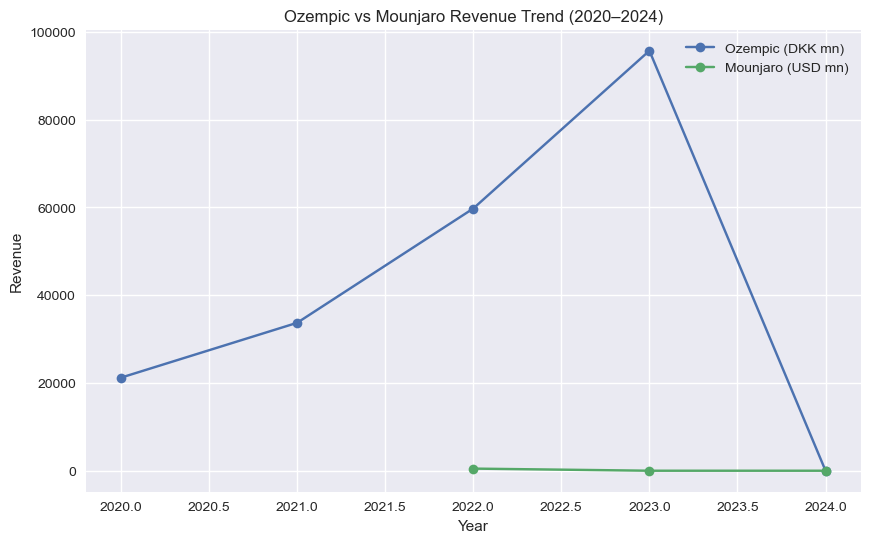

In [3]:
plt.figure(figsize=(10,6))
plt.plot(df["year"], df["ozempic_dkk_mn"], marker="o", label="Ozempic (DKK mn)")
plt.plot(df["year"], df["mounjaro_usd_mn"], marker="o", label="Mounjaro (USD mn)")
plt.title("Ozempic vs Mounjaro Revenue Trend (2020–2024)")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
df["novo_glp1_total"] = df["ozempic_dkk_mn"] + df["rybelsus_dkk_mn"] + df["wegovy_dkk_mn"]
df["lilly_glp1_total"] = df["mounjaro_usd_mn"] + df["zepbound_usd_mn"]

df["total_glp1"] = df["novo_glp1_total"] + df["lilly_glp1_total"]

# Avoid division by zero
df["novo_share"] = df["novo_glp1_total"] / df["total_glp1"].replace(0, pd.NA) * 100
df["lilly_share"] = df["lilly_glp1_total"] / df["total_glp1"].replace(0, pd.NA) * 100

df[["year","novo_share","lilly_share"]]


,year,novo_share,lilly_share
0,2020,100.0,0.0
1,2021,100.0,0.0
2,2022,99.326166,0.673834
3,2023,100.0,0.0
4,2024,<NA>,<NA>


C:\Users\PIntu\AppData\Local\Temp\ipykernel_63144\1304761546.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  plot_df = plot_df.fillna(0)


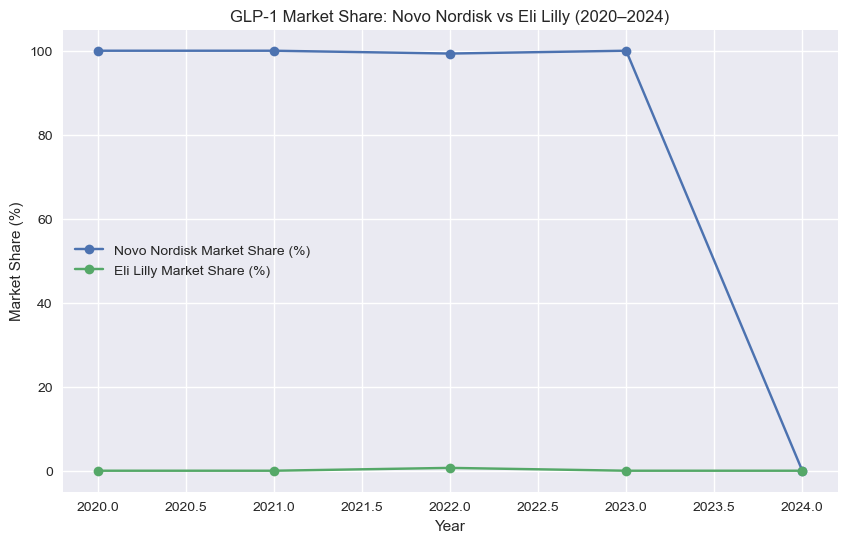

In [14]:
# Replace any NA values with 0 for plotting
plot_df = df.copy()
plot_df = plot_df.fillna(0)

plt.figure(figsize=(10,6))
plt.plot(plot_df["year"], plot_df["novo_share"], marker="o", label="Novo Nordisk Market Share (%)")
plt.plot(plot_df["year"], plot_df["lilly_share"], marker="o", label="Eli Lilly Market Share (%)")
plt.title("GLP-1 Market Share: Novo Nordisk vs Eli Lilly (2020–2024)")
plt.xlabel("Year")
plt.ylabel("Market Share (%)")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\PIntu\AppData\Local\Temp\ipykernel_63144\1983412550.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  plot_df = df.copy().fillna(0)


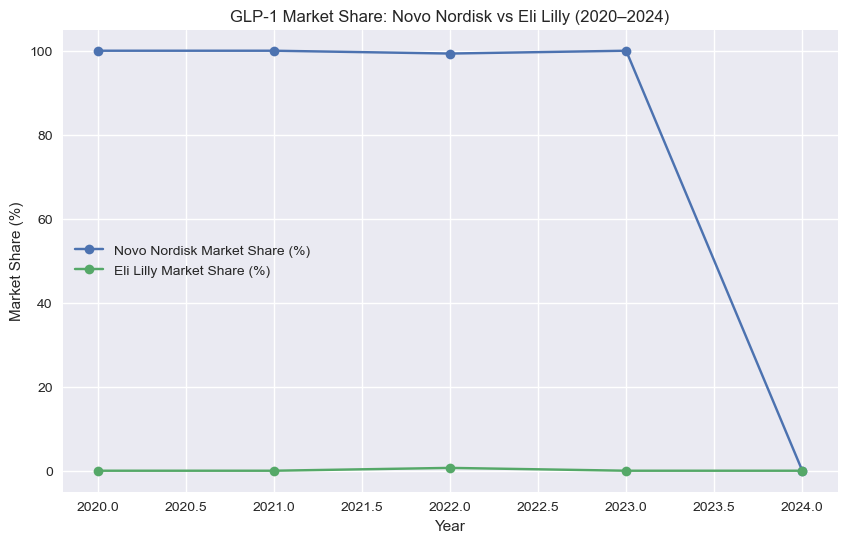

'D:\\Project\\glp1_ci_project_2020_2025\\reports\\figures\\market_share_novo_vs_lilly_2020_2024.png'

In [15]:
import os

# Make sure folder exists
fig_dir = r"D:\Project\glp1_ci_project_2020_2025\reports\figures"
os.makedirs(fig_dir, exist_ok=True)

# Recreate clean market share plot and save
plot_df = df.copy().fillna(0)

plt.figure(figsize=(10,6))
plt.plot(plot_df["year"], plot_df["novo_share"], marker="o", label="Novo Nordisk Market Share (%)")
plt.plot(plot_df["year"], plot_df["lilly_share"], marker="o", label="Eli Lilly Market Share (%)")
plt.title("GLP-1 Market Share: Novo Nordisk vs Eli Lilly (2020–2024)")
plt.xlabel("Year")
plt.ylabel("Market Share (%)")
plt.legend()
plt.grid(True)

out_path = os.path.join(fig_dir, "market_share_novo_vs_lilly_2020_2024.png")
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

out_path
